In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [20]:
data=pd.read_csv('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv')

In [21]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [23]:
data['Date']=pd.to_datetime(data['Date'])

In [41]:
data1=data.copy()

In [42]:
data1['day']=(data1['Date']).dt.day
data1['month']=(data1['Date']).dt.month
data1['year']=(data1['Date']).dt.year


In [43]:
data1.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019


In [44]:
data1.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'day', 'month', 'year'],
      dtype='object')

In [48]:
data_col=['Branch', 'City', 'Customer type', 'Gender',
       'Product line','Quantity','Payment','month','year']

In [49]:
for i in data_col:
    print(i + ': ')
    print(data1[i].unique())

Branch: 
['A' 'C' 'B']
City: 
['Yangon' 'Naypyitaw' 'Mandalay']
Customer type: 
['Member' 'Normal']
Gender: 
['Female' 'Male']
Product line: 
['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Quantity: 
[ 7  5  8  6 10  2  3  4  1  9]
Payment: 
['Ewallet' 'Cash' 'Credit card']
month: 
[1 3 2]
year: 
[2019]


In [53]:
data2=data1.copy()

In [52]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [54]:
label_data=['Branch', 'City', 'Customer type', 'Gender',
       'Product line','Payment']
for j in label_data:
    data2[j]=le.fit_transform(data2[j])
    

In [55]:
data2.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year
0,750-67-8428,0,2,0,0,3,74.69,7,26.1415,548.9715,2019-01-05,13:08,2,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,2,1,1,0,0,15.28,5,3.8200,80.2200,2019-03-08,10:29,0,76.40,4.761905,3.8200,9.6,8,3,2019
2,631-41-3108,0,2,1,1,4,46.33,7,16.2155,340.5255,2019-03-03,13:23,1,324.31,4.761905,16.2155,7.4,3,3,2019
3,123-19-1176,0,2,0,1,3,58.22,8,23.2880,489.0480,2019-01-27,20:33,2,465.76,4.761905,23.2880,8.4,27,1,2019
4,373-73-7910,0,2,1,1,5,86.31,7,30.2085,634.3785,2019-02-08,10:37,2,604.17,4.761905,30.2085,5.3,8,2,2019


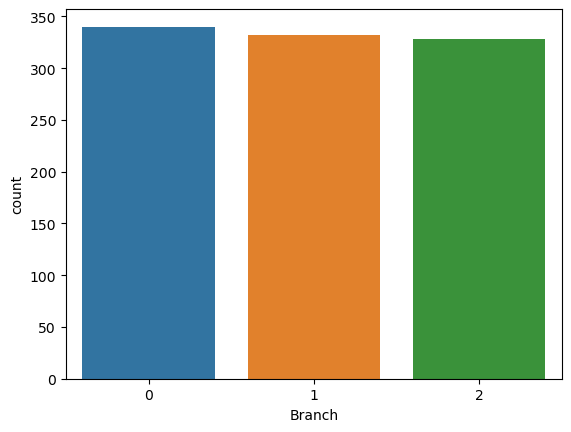

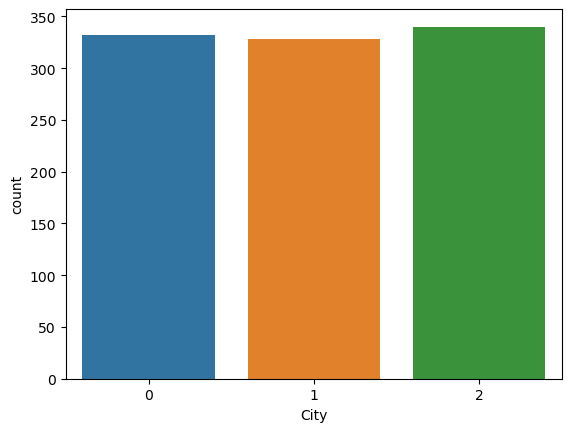

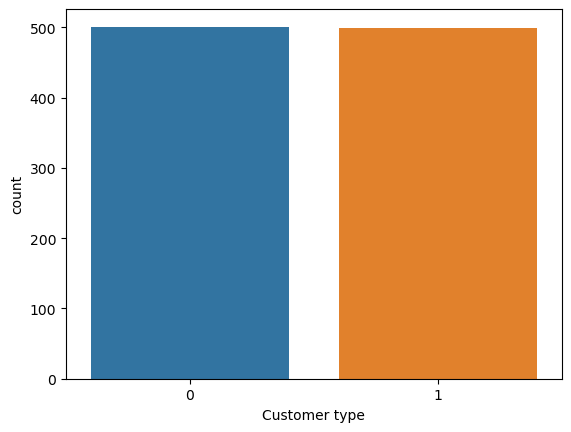

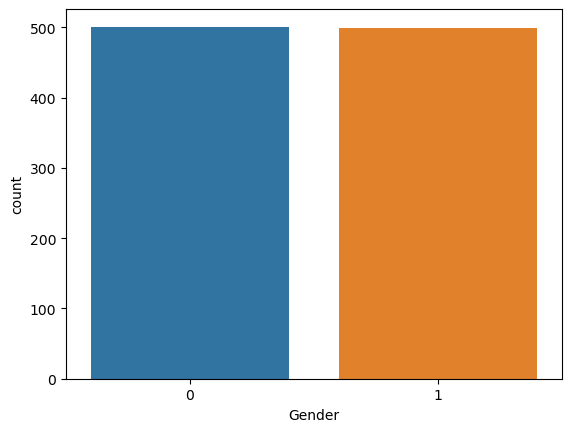

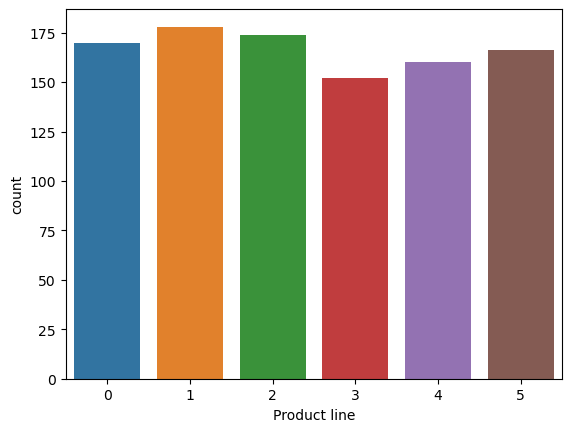

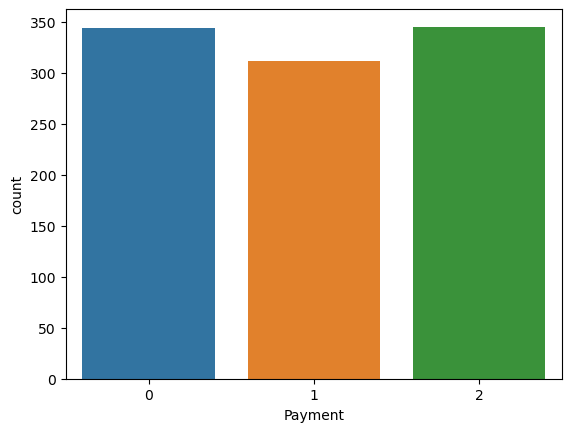

In [68]:
for k in label_data:
    sns.countplot(x=data2[k])
    plt.show()

<AxesSubplot:xlabel='month', ylabel='count'>

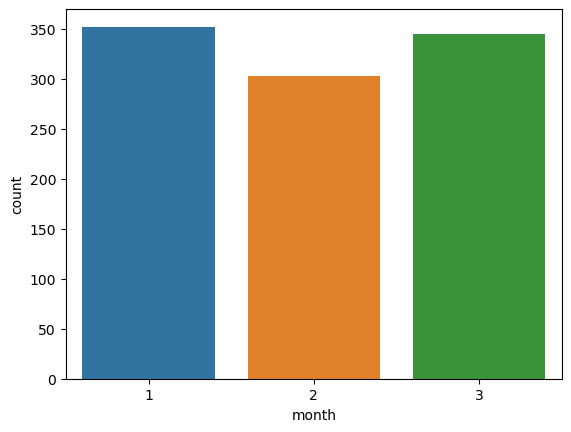

In [69]:
sns.countplot(x=data2['month'])

In [86]:
data3=data2.copy()

In [89]:
data3.drop(['Invoice ID', 'Date',
       'Time', 'day', 'month', 'year'],axis=1,inplace=True)

In [90]:
data3.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,0,2,0,0,3,74.69,7,26.1415,548.9715,2,522.83,4.761905,26.1415,9.1
1,2,1,1,0,0,15.28,5,3.8200,80.2200,0,76.40,4.761905,3.8200,9.6
2,0,2,1,1,4,46.33,7,16.2155,340.5255,1,324.31,4.761905,16.2155,7.4
3,0,2,0,1,3,58.22,8,23.2880,489.0480,2,465.76,4.761905,23.2880,8.4
4,0,2,1,1,5,86.31,7,30.2085,634.3785,2,604.17,4.761905,30.2085,5.3


In [97]:
data3.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [99]:
data3 = data3.reindex(columns=['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'Total'])

In [94]:
x=data3.drop(['Total'],axis=1)
y=data3[['Total']]

In [96]:
x.shape,y.shape, data3.shape

((1000, 13), (1000, 1), (1000, 14))

In [127]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)

In [128]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((600, 13), (400, 13), (600, 1), (400, 1))

In [129]:
from sklearn.preprocessing import StandardScaler
stand= StandardScaler()
x_train=stand.fit_transform(x_train)
x_test=stand.transform(x_test)

In [130]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor(n_estimators=100)

In [131]:
rfc.fit(x_train,y_train)

RandomForestRegressor()

In [119]:
from sklearn.metrics import r2_score

In [133]:
rfc_y_predict=rfc.predict(x_test)

In [136]:
r2_score(y_test, rfc_y_predict)

0.9999168836736355

In [153]:
for z in range(0,20):
    diff=y_test.values[z]-rfc_y_predict[z]
    print(y_test.values[z] , ' ', rfc_y_predict[z],' ', diff )

[523.971]   520.7179949999997   [3.253005]
[616.98]   615.1010249999998   [1.878975]
[408.7335]   408.7951350000001   [-0.061635]
[135.3555]   135.267195   [0.088305]
[45.927]   44.421615000000045   [1.505385]
[618.975]   618.7359149999999   [0.239085]
[127.827]   127.6583699999999   [0.16863]
[731.6925]   732.8826749999996   [-1.190175]
[450.1035]   450.6871949999997   [-0.583695]
[138.1275]   137.59137000000015   [0.53613]
[422.73]   423.18086999999997   [-0.45087]
[463.428]   462.43301999999966   [0.99498]
[212.7825]   213.09371999999988   [-0.31122]
[252.252]   252.40949999999998   [-0.1575]
[290.0835]   290.1311699999997   [-0.04767]
[331.128]   328.8291300000001   [2.29887]
[587.664]   588.1241099999999   [-0.46011]
[216.846]   216.94092000000012   [-0.09492]
[757.365]   758.0433000000002   [-0.6783]
[185.094]   184.8347549999999   [0.259245]


# **We get accuracy of 99% in test dataset.**